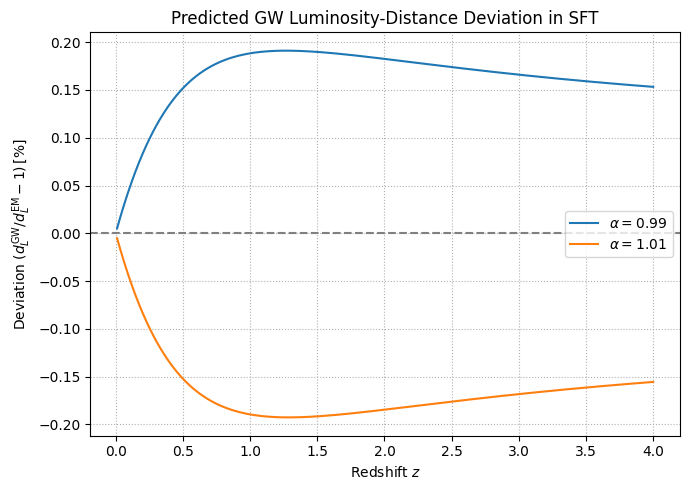

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid

# --- cosmological parameters ---
Omega_m0, Omega_r0, Omega_DE0 = 0.315, 9.034e-5, 0.68491

def E_LCDM(z):
    """Dimensionless Hubble parameter for ΛCDM"""
    return np.sqrt(Omega_m0*(1+z)**3 + Omega_r0*(1+z)**4 + Omega_DE0)

def E_SFT(z, alpha):
    """Dimensionless Hubble parameter for SFT with DE evolution index α"""
    a = 1.0 / (1.0 + z)
    return np.sqrt(Omega_m0*(1+z)**3 + Omega_r0*(1+z)**4 + Omega_DE0 * a**(3.0*(1.0-alpha)))

def dL_SFT(z, alpha):
    """Comoving luminosity distance integral (dimensionless form)"""
    zarr = np.linspace(0, z, 400)
    Ez = E_SFT(zarr, alpha)
    # Trapezoidal cumulative integral
    integral = cumulative_trapezoid(1.0/Ez, zarr, initial=0.0)
    return (1.0 + z) * integral[-1]

# --- compute ratios over a grid ---
z_vals = np.linspace(0.01, 4.0, 150)  # avoid z=0 singularity
dL_LCDM_vals = np.array([dL_SFT(z, 1.0) for z in z_vals])

plt.figure(figsize=(7,5))
for alpha in [0.99, 1.01]:
    dL_SFT_vals = np.array([dL_SFT(z, alpha) for z in z_vals])
    ratio = dL_SFT_vals / dL_LCDM_vals - 1.0
    plt.plot(z_vals, ratio * 100.0, label=fr"$\alpha={alpha}$")

plt.axhline(0, color='gray', linestyle='--')
plt.xlabel(r"Redshift $z$")
plt.ylabel(r"Deviation $(d_L^{\mathrm{GW}}/d_L^{\mathrm{EM}} - 1)\,[\%]$")
plt.title(r"Predicted GW Luminosity-Distance Deviation in SFT")
plt.grid(True, linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()
